In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import os
_URL = 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'
zip_dir = tf.keras.utils.get_file('rockpaperscissors.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(zip_dir), 'rockpaperscissors/rps-cv-images')

In [4]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
os.listdir(PATH)

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [6]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    vertical_flip = True,
    horizontal_flip = True,
    rotation_range = 45,
    fill_mode = 'wrap',
    shear_range = 0.2,
    validation_split = 0.2
    )


In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=PATH,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           subset = 'training'
                                                           )

val_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=PATH,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           subset = 'validation'
                                                           )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [8]:
classes = train_data_gen.class_indices    
print(classes)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [9]:
model = Sequential([
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax'),
])

In [10]:
model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [12]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= 1751 // batch_size,
    epochs= 15,
    validation_data=val_data_gen,
    validation_steps= 437 // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
13/13 [==============================] - 46s 4s/step - loss: 1.4001 - accuracy: 0.3623 - val_loss: 1.0752 - val_accuracy: 0.3568
Epoch 2/15
13/13 [==============================] - 46s 4s/step - loss: 1.0337 - accuracy: 0.5139 - val_loss: 0.9842 - val_accuracy: 0.6641
Epoch 3/15
13/13 [==============================] - 45s 3s/step - loss: 0.9174 - accuracy: 0.6482 - val_loss: 0.8404 - val_accuracy: 0.7266
Epoch 4/15
13/13 [==============================] - 45s 3s/step - loss: 0.7600 - accuracy: 0.7326 - val_loss: 0.6982 - val_accuracy: 0.7865
Epoch 5/15
13/13 [==============================] - 46s 4s/step - loss: 0.6255 - accuracy: 0.7874 - val_loss: 0.5811 - val_accuracy: 0.7917
Epoch 6/15
13/13 [==============================] - 46s 4s/step - loss: 0.5598 - accuracy: 0.7927 - val_loss: 0.5557 - val_accuracy: 0.8203
Epoch 7/15
13/13 [==============================] - 45s 3s/step - loss: 0.4790 - acc

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline 

Using TensorFlow backend.


Saving 1mnAKQCHEDbtjPX2.png to 1mnAKQCHEDbtjPX2.png
1mnAKQCHEDbtjPX2.png
Rock


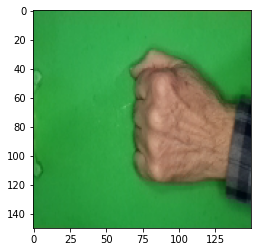

In [15]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image = np.vstack([x])
  classes = model.predict(image, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print("Paper")
  elif classes[0][1]==1:
    print("Rock")
  elif classes[0][2]==1:
    print("Scissors")
  else:
    print("Uknown") 